# Introduction

## A probabilistic neural network (PNN) is a feedforward neural network, which is widely used in classification and pattern recognition problems. In the PNN algorithm, the parent probability distribution function (PDF) of each class is approximated by a Parzen window and a non-parametric function. Then, using PDF of each class, the class probability of a new input data is estimated and Bayes’ rule is then employed to allocate the class with highest posterior probability to new input data.

## By this method, the probability of mis-classification is minimized. This type of ANN was derived from the Bayesian network and a statistical algorithm called Kernel Fisher discriminant analysis. It was introduced by D.F. Specht in 1966.

## In a PNN, the operations are organized into a multilayered feedforward network with four layers:

* **Input layer**
* **Pattern layer**
* **Summation layer**
* **Output layer**


In [1]:
# Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style("ticks")
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =7

In [12]:
def Create_DataFrame():
    # defining the features and class labels as a dictionary
    data = {
            "Feature_1" : [0.1, 0.5,  0.2, 0.6,  0.8,  0.4,  0.8,  0.6,  0.3],
            "Feature_2" : [0.9, 0.9,  0.7, 0.6,  0.8,  0.5,  0.5,  0.3,  0.2],
            "Class_Label" : [1, 1, 1, 2, 2, 2, 3, 3, 3]
           }

    # converting the dictionary into a dataframe
    df = pd.DataFrame(data = data)
    
    return df

In [13]:
def PNN(df, DesiredPoint):
    # defining a group for each class labels
    Clusters = df.groupby("Class_Label")

    # defining the number of classes as clusters
    NumClusters = len(Clusters)

    # an empty dictionary for calculating the sum of Gaussian for each class
    GaussianSums = dict()

    # defining the number of features
    NumFeatures = df.shape[1] - 1

    # defining the standard deviation for Gaussian distribution
    Sigma = 1.0

    # creating features array
    Features = df.drop(["Class_Label"], axis = 1).values

    # INPUT LAYER OF PNN

    # defining a row variable for moving over the data row by row
    _row = 0

    # loop over the number of clusters
    for i in range(1, NumClusters + 1):

        # initialize the GaussianSum for each class
        GaussianSums[i] = 0.0

        # defining the number of points per cluster
        PointsPerCluster = len(Clusters.get_group(i))

        # PATTERN LAYER OF PNN
        # definining temporary sum for holding the sum of X and Y elements
        TempSum = 0.0
        # loop over points of each cluster and GaussianSum calculation
        for j in range(1, PointsPerCluster + 1):
            # calculating the X element of Gauassian
            TempX = ( DesiredPoint[0] - Features[_row][0]  )**2
            # calculating the y element of Gauassian
            TempY = ( DesiredPoint[1] - Features[_row][1]  )**2
            # calculating the Gaussian
            TempCoeff = -(TempX + TempY)/(2.0 * Sigma**2)
            # adding the calculated Gaussian for all the points per cluster
            TempSum +=  TempCoeff
            # incrementing the row to cover all points per cluster
            _row += 1
        # storing the GaussianSum per cluster in a dictionary
        GaussianSums[i] = TempSum

    # returning the key of the maximum GaussianSum per cluster  
    CalculatedClass = max(GaussianSums, key = GaussianSums.get)
    
    # Visualization
    Visualization(df, Features, DesiredPoint, CalculatedClass)
    
    print("Calculated Class = " + str(CalculatedClass))

In [28]:
def Visualization(df, Features, DesiredPoint, CalculatedClass):    
    
    color_dict = {1 : "Red", 2 : "Yellow", 3 : "Green"}
    plt.figure(figsize=(10,6))
    plt.scatter(Features[:,0],
                Features[:,1], 
                s = 300.,
                c = df["Class_Label"],
                cmap=plt.cm.prism,
                marker = "o",
                lw = 3,
                edgecolor='k')
    plt.scatter(DesiredPoint[0],
                DesiredPoint[1], 
                s = 300.,
                c = "k",
                marker = "*",
                lw = 3,
                edgecolor='k')
    plt.xlabel("Feature 1", fontsize = 20)
    plt.ylabel("Feature 2", fontsize = 20)
    plt.title("Predicted Cluster = " + color_dict[CalculatedClass], fontsize = 20)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.show()

In [29]:
def main():
    # desired point for clustering
    DesiredPoint = [0.9, 0.1]
    df = Create_DataFrame()
    print("************** Dataframe ***************")
    print(df)
    print("****************************************")
    print("Desired Point = [{}, {}]".format(DesiredPoint[0], DesiredPoint[1]))
    PNN(df, DesiredPoint)

************** Dataframe ***************
   Class_Label  Feature_1  Feature_2
0            1        0.1        0.9
1            1        0.5        0.9
2            1        0.2        0.7
3            2        0.6        0.6
4            2        0.8        0.8
5            2        0.4        0.5
6            3        0.8        0.5
7            3        0.6        0.3
8            3        0.3        0.2
****************************************
Desired Point = [0.9, 0.1]


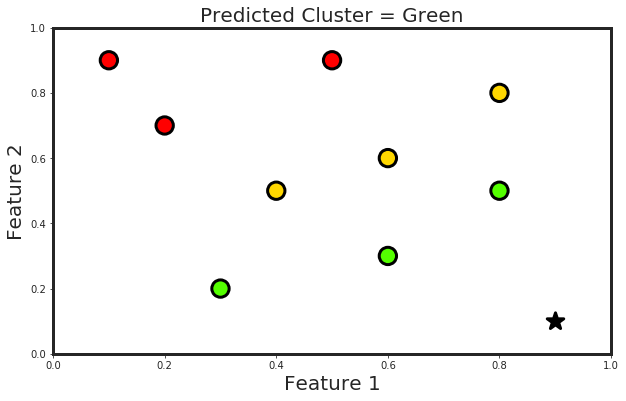

Calculated Class = 3


In [30]:
main()